In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import pandas as pd

In [5]:
# Данные задачи
f = lambda x: -1.38 * x**3 - 5.42 * x**2 + 2.57 * x + 10.95
derivative_f = lambda x: -4.14 * x**2 - 10.84 * x + 2.57  # Производная f(x) для метода Ньютона
interval = [-5, 3]
eps = 0.001

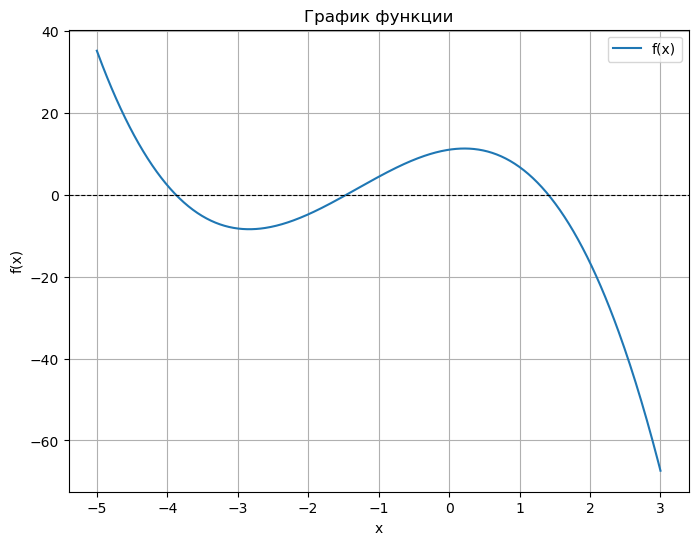

In [6]:
# 1. Построение графика функции
x = np.linspace(interval[0], interval[1], 500)
y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="f(x)")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("График функции")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.show()

In [7]:
# 2. Определение интервалов с единственным корнем
# Сканируем график на наличие знакопеременности
roots_intervals = []
for i in range(len(x) - 1):
    if y[i] * y[i + 1] < 0:  # Знакопеременность
        roots_intervals.append((x[i], x[i + 1]))

print("Интервалы с единственным корнем:", roots_intervals)

Интервалы с единственным корнем: [(-3.8937875751503004, -3.877755511022044), (-1.456913827655311, -1.4408817635270545), (1.396793587174348, 1.4128256513026045)]


In [8]:
# 3. Реализация методов для нахождения корней

def bisection_method(a, b, func, tolerance):
    iterations = []
    while abs(b - a) > tolerance:
        c = (a + b) / 2
        iterations.append((a, b, c, func(c)))
        if func(a) * func(c) < 0:
            b = c
        else:
            a = c
    return c, iterations

def chord_method(a, b, func, tolerance):
    iterations = []
    while abs(b - a) > tolerance:
        c = b - func(b) * (b - a) / (func(b) - func(a))
        iterations.append((a, b, c, func(c)))
        a, b = b, c
    return c, iterations

def newton_method(x0, func, d_func, tolerance):
    iterations = []
    while True:
        x1 = x0 - func(x0) / d_func(x0)
        iterations.append((x0, x1, func(x1)))
        if abs(x1 - x0) < tolerance:
            break
        x0 = x1
    return x1, iterations

In [9]:
# Пример использования методов
results = {}
for interval in roots_intervals:
    a, b = interval

    # Метод половинного деления
    root_bisect, iters_bisect = bisection_method(a, b, f, eps)

    # Метод хорд
    root_chord, iters_chord = chord_method(a, b, f, eps)

    # Метод Ньютона
    x0 = (a + b) / 2
    root_newton, iters_newton = newton_method(x0, f, derivative_f, eps)

    results[interval] = {
        "Bisection": (root_bisect, len(iters_bisect)),
        "Chord": (root_chord, len(iters_chord)),
        "Newton": (root_newton, len(iters_newton)),
    }

In [ ]:
# 4. Вывод результатов
for interval, methods in results.items():
    print(f"\nИнтервал: {interval}")
    for method, (root, iterations) in methods.items():
        print(f"{method}: Корень = {root:.6f}, Количество итераций = {iterations}")


Интервал: (-3.8937875751503004, -3.877755511022044)
Bisection: Корень = -3.880261, Количество итераций = 5
Chord: Корень = -3.880518, Количество итераций = 2
Newton: Корень = -3.880518, Количество итераций = 2

Интервал: (-1.456913827655311, -1.4408817635270545)
Bisection: Корень = -1.453407, Количество итераций = 5
Chord: Корень = -1.453658, Количество итераций = 2
Newton: Корень = -1.453658, Количество итераций = 2

Интервал: (1.396793587174348, 1.4128256513026045)
Bisection: Корень = 1.406313, Количество итераций = 5
Chord: Корень = 1.406640, Количество итераций = 2
Newton: Корень = 1.406640, Количество итераций = 2
